In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('employee_attrition.csv.csv')

# Display dataset shape
print("Dataset Shape:", df.shape)
print("\n" + "="*50 + "\n")

# Display first 5 rows
print("First 5 Rows:")
print(df.head())
print("\n" + "="*50 + "\n")

# Display dataset information
print("Dataset Information:")
print(df.info())

Dataset Shape: (1470, 35)


First 5 Rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction

In [5]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Check duplicate records
print("Duplicate Records:", df.duplicated().sum())
print("\n" + "="*50 + "\n")

# Analyze target variable distribution
print("Attrition Distribution:")
print(df['Attrition'].value_counts())
print("\nPercentage Distribution:")
print(df['Attrition'].value_counts(normalize=True) * 100)
print("\n" + "="*50 + "\n")

# Summary statistics
print("Summary Statistics:")
print(df.describe())

Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

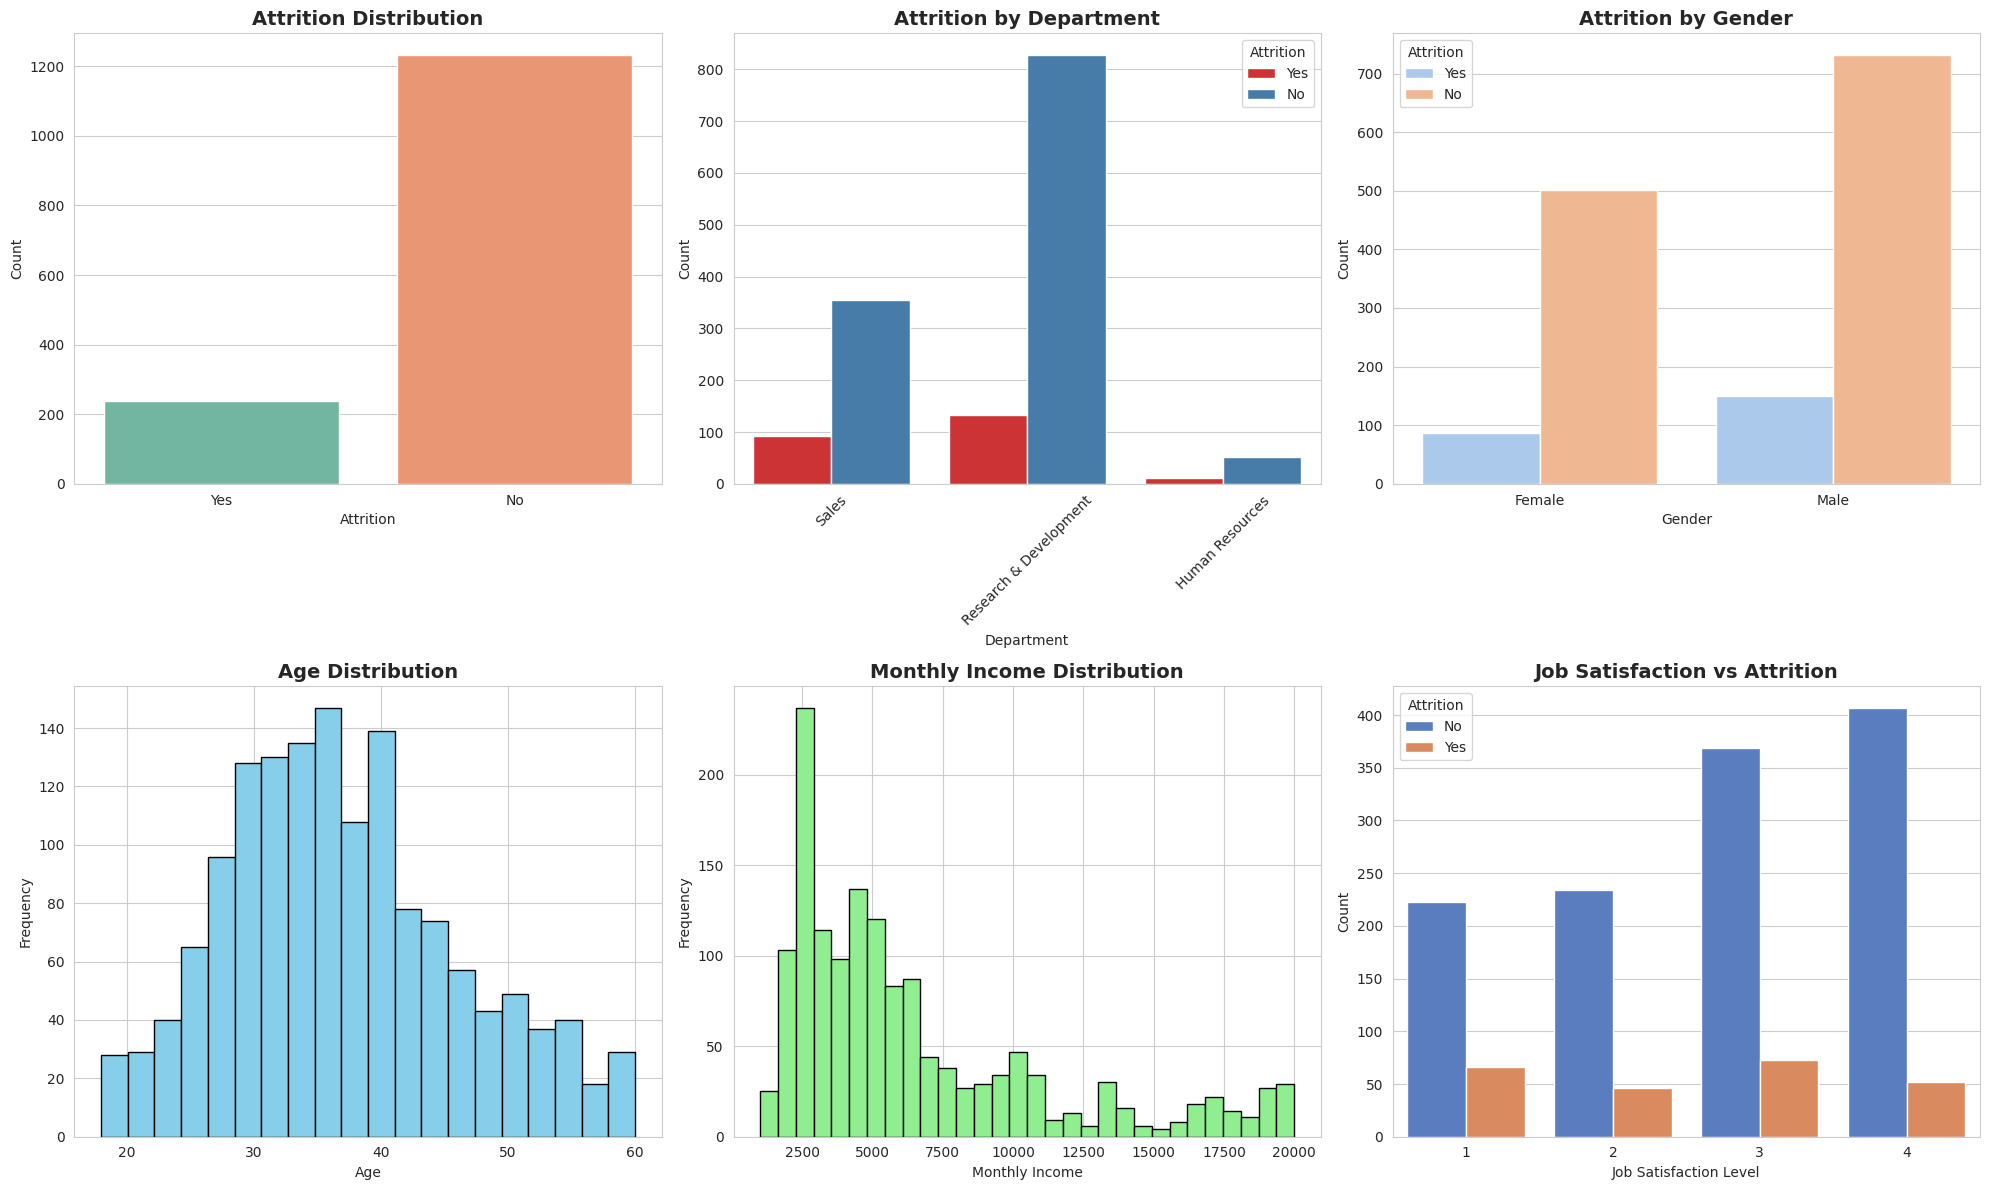

In [6]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))

# 1. Attrition Count Plot
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Attrition Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Attrition')
plt.ylabel('Count')

# 2. Attrition vs Department
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set1')
plt.title('Attrition by Department', fontsize=14, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 3. Attrition vs Gender
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Gender', hue='Attrition', palette='pastel')
plt.title('Attrition by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')

# 4. Age Distribution
plt.subplot(2, 3, 4)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 5. Monthly Income Distribution
plt.subplot(2, 3, 5)
plt.hist(df['MonthlyIncome'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Monthly Income Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')

# 6. Job Satisfaction vs Attrition
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='muted')
plt.title('Job Satisfaction vs Attrition', fontsize=14, fontweight='bold')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [7]:
# Create a copy of the dataframe
df_processed = df.copy()

# Convert target variable to binary
df_processed['Attrition'] = df_processed['Attrition'].map({'Yes': 1, 'No': 0})

# Identify categorical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_processed[col] = label_encoder.fit_transform(df_processed[col])

print("\nEncoding Complete!")
print("\n" + "="*50 + "\n")

# Select relevant features (drop irrelevant columns)
# Dropping EmployeeCount, EmployeeNumber, StandardHours, Over18 as they don't add value
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
df_processed = df_processed.drop(columns=columns_to_drop, errors='ignore')

# Separate features and target
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)
print("\n" + "="*50 + "\n")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)
print("\n" + "="*50 + "\n")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Complete!")

Categorical Columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Encoding Complete!


Features Shape: (1470, 30)
Target Shape: (1470,)


Training Set Size: (1176, 30)
Test Set Size: (294, 30)


Feature Scaling Complete!


MODEL EVALUATION - RANDOM FOREST

Accuracy Score: 0.8401 (84.01%)


Confusion Matrix:
[[241   6]
 [ 41   6]]


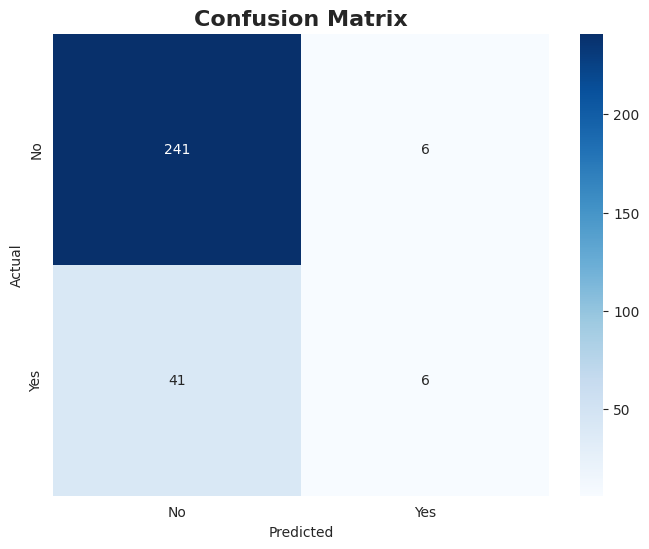



Classification Report:
              precision    recall  f1-score   support

No Attrition       0.85      0.98      0.91       247
   Attrition       0.50      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.68      0.55      0.56       294
weighted avg       0.80      0.84      0.80       294



In [8]:
# Train Random Forest Classifier (you can choose any one model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("="*50)
print("MODEL EVALUATION - RANDOM FOREST")
print("="*50 + "\n")

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\n" + "="*50 + "\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n" + "="*50 + "\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Attrition', 'Attrition']))